## Informasi Mahasiswa

Nama:Sofia

NPM : 2108107010006

# SVM Classification

## Dataset

### Heart Disease

Pada tugas 2 ini, saya menggunakan dataset Heart Disease dari sumber [UCI Edu](https://archive.ics.uci.edu/dataset/45/heart+disease). 

Heart disease (penyakit jantung) menggambarkan berbagai kondisi yang memengaruhi jantung Anda. Penyakit Heart disease, antara lain, blood vessel disease (penyakit pembuluh darah), seperti penyakit arteri koroner, masalah irama jantung (arrhythmias) dan kelainan jantung sejak lahir (congenital heart defects).

Istilah "Heart disease" sering digunakan secara bergantian dengan istilah "cardiovascular disease". cardiovascular disease umumnya merujuk pada kondisi yang melibatkan pembuluh darah yang menyempit atau tersumbat yang dapat menyebabkan serangan jantung, nyeri dada (angina) atau stroke. Kondisi jantung lainnya, seperti kondisi yang memengaruhi otot, katup, atau irama jantung, juga dianggap sebagai bentuk Heart disease.

Dataset ini memberikan sejumlah variabel bersama dengan kondisi target memiliki atau tidak memiliki Heart disease. 

Dataset ini berisi fitur-fitur berikut:
1. age: Usia (years)
2. sex: Jenis Kelamin (1 = male, 0 = female)
3. cp: Nyeri dada yang dialami (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. trestbps: Tekanan darah normal pasien (mm Hg)
5. chol: Kolesterol Pasien (mg/dl)
6. fbs: Gula darah puasa pasien (> 120 mg/dl, 1 = true; 0 = false)
7. restecg: Pengukuran elektrokardiografi istirahat (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach: Denyut jantung maksimum
9. exang: Angina yang diinduksi oleh olahraga (1 = yes; 0 = no)
10. oldpeak: Depresi ST yang diinduksi oleh latihan relatif terhadap istirahat ('ST' relates to positions on the ECG plot.)
11. slope: kemiringan segmen ST latihan puncak (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. ca: Jumlah pembuluh darah utama (0-3)
13. thal: Kelainan darah yang disebut talasemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

Dataset ini memiliki label, yaitu:
- target: Penyakit jantung (0 = no, 1 = yes)

## Acessing Data

### Import Libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [85]:
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Preprocessing Data

Mengecek missing value pada data

In [86]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Mengecek duplikasi pada data

In [88]:
df.duplicated().sum()

1

Terdapat 1 data yang duplicate, sehingga dilakukan cleaning dengan drop data duplicate tersebut

In [89]:
df = df.drop_duplicates()

In [90]:
df.duplicated().sum()

0

Menghitung jumlah nilai yang unik dalam kolom 'target' pada data untuk 1 dan 0 

In [91]:
df.target.value_counts()

target
1    164
0    138
Name: count, dtype: int64

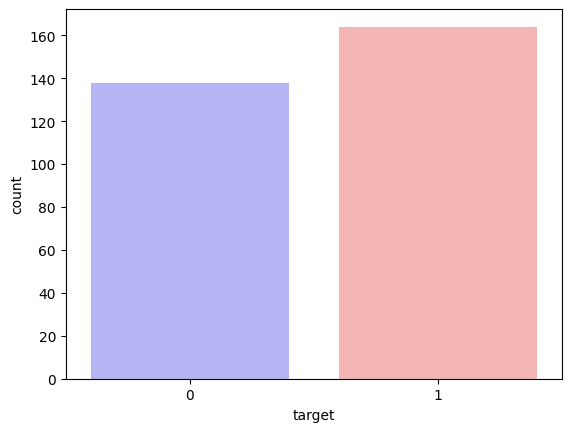

In [92]:
sns.countplot(x="target", data=df, hue="target", palette="bwr", legend=False)
plt.show()

Membuat variabel independen (x) dengan menggunakan metode drop() untuk menghapus kolom "target", dan membuat variabel dependen (y) dengan memilih kolom "target" dari dataframe df dan menyimpannya dalam variabel y. Sehingga variabel x akan berisi fitur-fitur yang digunakan untuk memprediksi target, sementara variabel y akan berisi target yang akan diprediksi.

In [93]:
x = df.drop(labels="target", axis=1)
y = df["target"]

## Membangun Model SVC

Melakukan penskalaan fitur pada data x

In [94]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)

Mengurangi dimensi data menjadi dua komponen utama (principal components) dari inputan x_norm yang telah dinormalisasi sebelumnya.

In [97]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_norm)

Melakukan pembagian dataset menjadi dua bagian, yaitu data training dan testing. Nantinya X_train dan y_train akan digunakan untuk melatih model, dan X_test serta y_test untuk menguji kinerja model pada data yang belum pernah dilihat sebelumnya

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

### SVC Linear

Membangun model SVC dengan menggunakan kernel linear sebagai parameter. Parameter C diberikan nilai 0.1 untuk mengontrol penalti terhadap kesalahan klasifikasi. Selanjutnya, model SVC dilatih dengan menggunakan data latih (x_train, y_train), dan kemudian digunakan untuk membuat prediksi terhadap data uji (x_test) dengan memanggil metode predict().

In [99]:
classification_ln = SVC(kernel="linear", C=0.1)
classification_ln.fit(x_train, y_train)
predicts_ln = classification_ln.predict(x_test)

Menggunakan fungsi confusion_matrix dari modul sklearn.metrics untuk menghitung matriks konfusi dari model yang menggunakan kernel linear.

In [100]:
cm_ln = confusion_matrix(y_test, predicts_ln)
print("Confusion Matrix (Linear Kernel):\n", cm_ln)

Confusion Matrix (Linear Kernel):
 [[22  5]
 [ 4 30]]


Menghitung akurasi model dengan kernel linear pada data uji, dan mencetak akurasi model dalam bentuk persentase.

In [101]:
accuracy_ln = classification_ln.score(x_test, y_test)
print("Test Accuracy of SVM Algorithm (Linear): {:.2f}%".format(accuracy_ln * 100))

Test Accuracy of SVM Algorithm (Linear): 85.25%


Hal ini menunjukkan bahwa model memiliki kinerja yang baik dalam memprediksi kategori target pada data uji, dengan akurasi sebesar 85,25%

### SVC RBF(Radial Basis Function)

Membangun model SVC dengan menggunakan kernel rbf sebagai parameter. Parameter C diberikan nilai 1.0 untuk mengontrol penalti terhadap kesalahan klasifikasi, sementara parameter gamma diatur ke "scale" untuk menyesuaikan nilai gamma secara otomatis. Model SVC kemudian dilatih menggunakan data latih (x_train, y_train), dan digunakan untuk membuat prediksi terhadap data uji (x_test) dengan memanggil metode predict().

In [102]:
classification_rbf = SVC(kernel="rbf", C=1.0, gamma="scale")
classification_rbf.fit(x_train, y_train)
predicts_rbf = classification_rbf.predict(x_test)

Menggunakan fungsi confusion_matrix dari modul sklearn.metrics untuk menghitung matriks konfusi dari model yang menggunakan kernel rbf.

In [103]:
cm_rbf = confusion_matrix(y_test, predicts_rbf)
print("Confusion Matrix (RBF Kernel):\n", cm_rbf)

Confusion Matrix (RBF Kernel):
 [[22  5]
 [ 2 32]]


Menghitung akurasi model dengan kernel rbf pada data uji, dan mencetak akurasi model dalam bentuk persentase.

In [104]:
accuracy_rbf = classification_rbf.score(x_test, y_test)
print("Test Accuracy of SVM Algorithm (RBF): {:.2f}%".format(accuracy_rbf * 100))

Test Accuracy of SVM Algorithm (RBF): 88.52%


Hal ini menunjukkan bahwa model memiliki kinerja yang baik dalam memprediksi kategori target pada data uji, dengan akurasi sebesar 88,52%.

In [105]:
# classification report for Linear Kernel
print("Classification Report (Linear Kernel):\n", classification_report(y_test, predicts_ln))

# classification report for RBF Kernel
print("Classification Report (RBF Kernel):\n", classification_report(y_test, predicts_rbf))

Classification Report (Linear Kernel):
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



Menyajikan metrik evaluasi seperti presisi (precision), recall, dan F1-score untuk setiap kelas target (0 dan 1), serta akurasi total dari model. Dari hasil laporan, dapat dilihat bahwa model dengan kernel RBF memiliki kinerja yang sedikit lebih baik dibandingkan dengan model linear, dengan akurasi dan F1-score yang lebih tinggi untuk kelas 1 (penyakit jantung).

## Visualisasi Data

Visualisasi ini menampilkan hasil dari pemodelan SVM dengan kernel linear pada data set yang direduksi dimensinya menggunakan analisis komponen utama (PCA). Grafik pada bagian kiri menunjukkan garis keputusan (decision boundary) yang dihasilkan oleh model, yang membagi ruang fitur dua dimensi menjadi area yang diklasifikasikan sebagai kelas positif dan negatif. Titik-titik data diwarnai berdasarkan kelasnya: biru dan orange mewakili kelas yang berbeda. Warna biru mewakili sampel yang termasuk dalam kelas yang positif (penyakit jantung), sementara warna orange mewakili sampel yang termasuk dalam kelas yang negatif (tidak ada penyakit jantung). Grafik pada bagian kanan hanya menampilkan titik data untuk memberikan representasi visual yang lebih sederhana tentang distribusi sampel dalam ruang fitur yang direduksi.

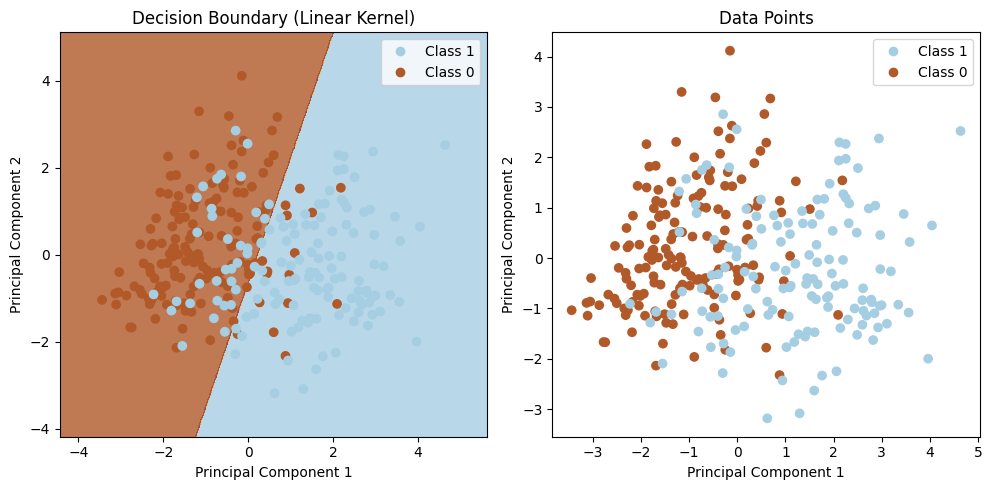

In [106]:
plt.figure(figsize=(10, 5))

# Plot decision boundary
plt.subplot(1, 2, 1)
h = 0.02  # Step size
x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classification_ln.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary (Linear Kernel)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1', 'Class 0'])

# Plot data points
plt.subplot(1, 2, 2)
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1', 'Class 0'])

plt.tight_layout()
plt.show()

Visualisasi ini menampilkan hasil dari pemodelan SVM dengan kernel rbf pada data set yang direduksi dimensinya menggunakan analisis komponen utama (PCA). Grafik pada bagian kiri menunjukkan garis keputusan (decision boundary) yang dihasilkan oleh model, yang membagi ruang fitur dua dimensi menjadi area yang diklasifikasikan sebagai kelas positif dan negatif. Titik-titik data diwarnai berdasarkan kelasnya: biru dan orange mewakili kelas yang berbeda. Warna biru mewakili sampel yang termasuk dalam kelas yang positif (penyakit jantung), sementara warna orange mewakili sampel yang termasuk dalam kelas yang negatif (tidak ada penyakit jantung). Grafik pada bagian kanan hanya menampilkan titik data untuk memberikan representasi visual yang lebih sederhana tentang distribusi sampel dalam ruang fitur yang direduksi.

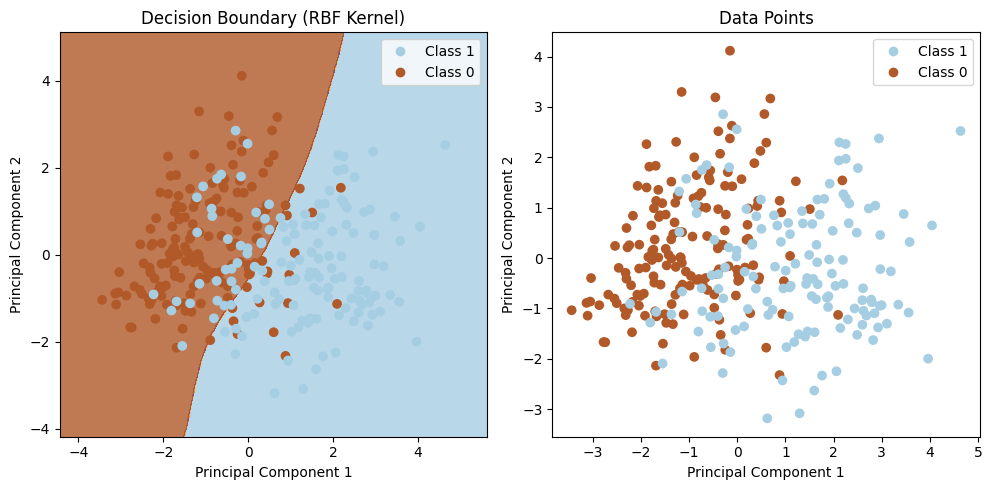

In [107]:
plt.figure(figsize=(10, 5))

# Plot decision boundary
plt.subplot(1, 2, 1)
h = 0.02  # Step size
x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classification_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary (RBF Kernel)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1', 'Class 0'])

# Plot data points
plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1', 'Class 0'])

plt.tight_layout()
plt.show()